In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('fivethirtyeight')


In [2]:
import pydotplus as dot

In [3]:
import graphviz as gv

In [4]:
dftr= pd.read_csv(r"C:\Users\School\Desktop\Datasets\DT data\LoanPred_train.csv")

In [5]:
dfte = pd.read_csv(r"C:\Users\School\Desktop\Datasets\DT data\LoanPred_test.csv")

In [6]:
dftr.shape

(614, 13)

In [7]:
dfte.shape

(367, 12)

In [8]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
dftr.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
dftr.columns = map(str.lower, dftr.columns)

In [11]:
dftr.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [12]:
dfte.columns = map(str.lower, dfte.columns)

In [13]:
dfte.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [14]:
len(dftr.columns)

13

In [15]:
dftr.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
applicantincome,614,5403.46,6109.04,150,2877.5,3812.5,5795,81000
coapplicantincome,614,1621.25,2926.25,0,0,1188.5,2297.25,41667
loanamount,592,146.412,85.5873,9,100,128,168,700
loan_amount_term,600,342,65.1204,12,360,360,360,480
credit_history,564,0.842199,0.364878,0,1,1,1,1


In [16]:
from sklearn.tree import export_graphviz

In [17]:
dftr.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of loan_id               object
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object>

In [18]:
dftr.ftypes

loan_id               object:dense
gender                object:dense
married               object:dense
dependents            object:dense
education             object:dense
self_employed         object:dense
applicantincome        int64:dense
coapplicantincome    float64:dense
loanamount           float64:dense
loan_amount_term     float64:dense
credit_history       float64:dense
property_area         object:dense
loan_status           object:dense
dtype: object

In [19]:
dfte.married.unique() 

array(['Yes', 'No'], dtype=object)

In [20]:
dfte.gender.unique() 

array(['Male', 'Female', nan], dtype=object)

In [21]:
dfte.dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

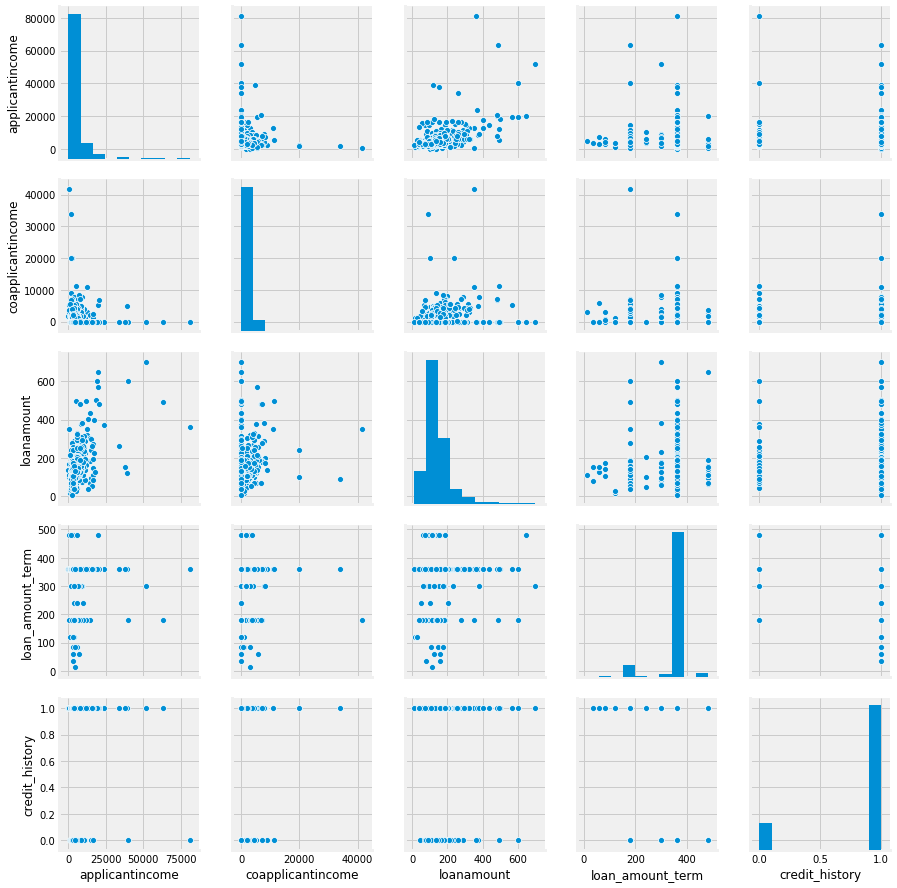

In [22]:
sns.pairplot(dftr, height=2.5, palette='Paired');

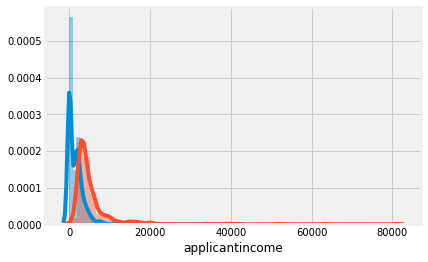

In [23]:
sns.distplot(dftr['coapplicantincome'])
sns.distplot(dftr['applicantincome'])


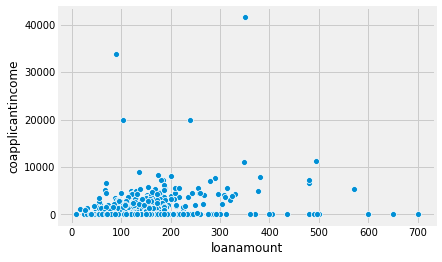

In [24]:
sns.scatterplot(x='loanamount', y = 'coapplicantincome', data=dftr)

In [25]:
dftr.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [26]:
dftr['loanamount'].fillna(dftr.loanamount.mean())

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.412162
606    173.000000
607    157.000000
608    108

In [27]:
dftr['totalincome'] = dftr['applicantincome'] + dftr['coapplicantincome']

In [28]:
dftr['loanamount'].isna().sum()

22

In [29]:
dftr['loanamount'].mean()

146.41216216216216

In [30]:
dftr['loanamount'].fillna(dftr['loanamount'].mean())

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.412162
606    173.000000
607    157.000000
608    108

In [31]:
dftr['loanamount'].fillna(dftr['loanamount'].mean(),inplace=True)

In [32]:
dftr['loanamount'].isna().sum()

0

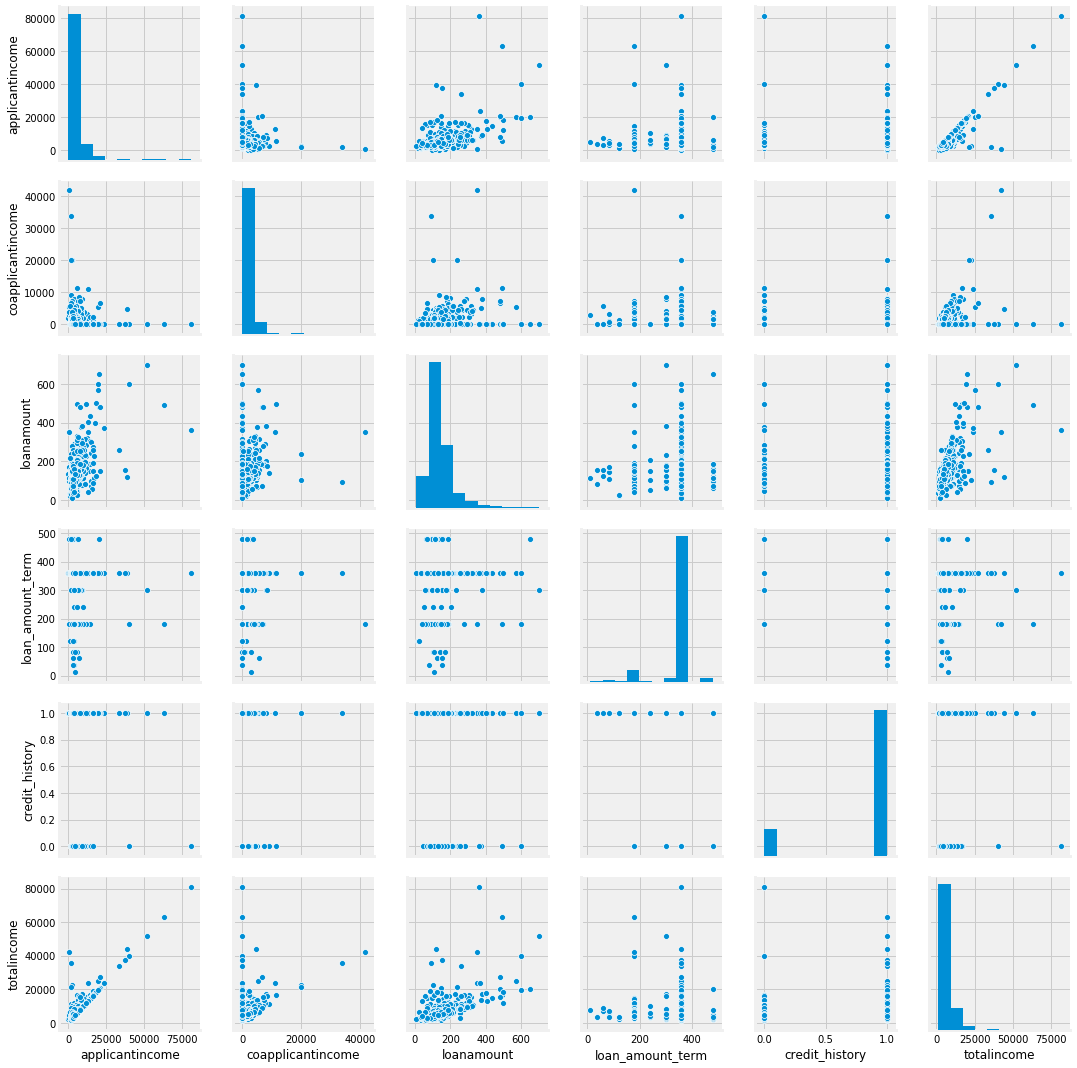

In [33]:
sns.pairplot(dftr)

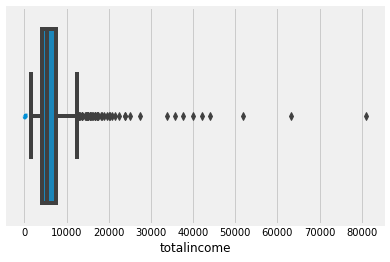

In [34]:
sns.distplot(dftr['loanamount'])
sns.boxplot(dftr['totalincome'])

<Figure size 1080x576 with 0 Axes>

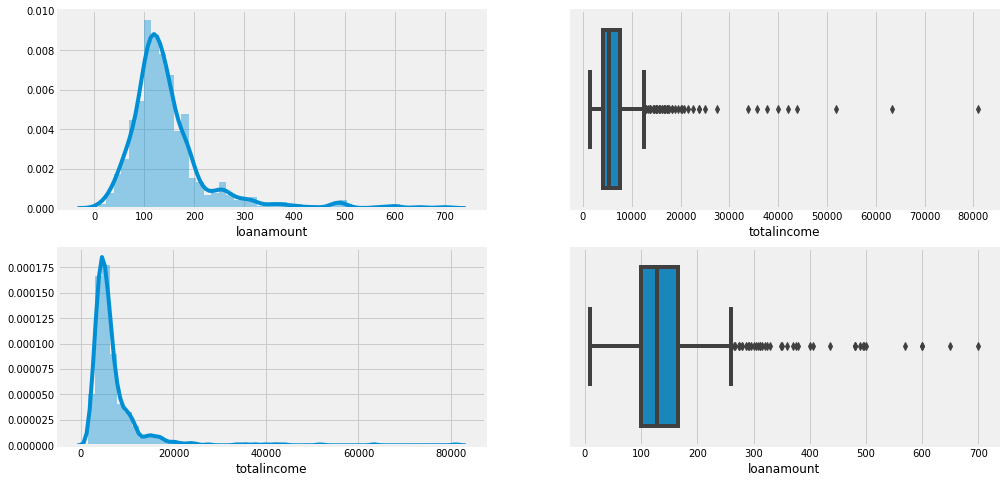

In [35]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.distplot(dftr['loanamount'])


plt.subplot(222)
sns.boxplot(dftr['totalincome'])

plt.subplot(223)
sns.distplot(dftr['totalincome'])

plt.subplot(224)
sns.boxplot(dftr['loanamount'])

<Figure size 1080x576 with 0 Axes>

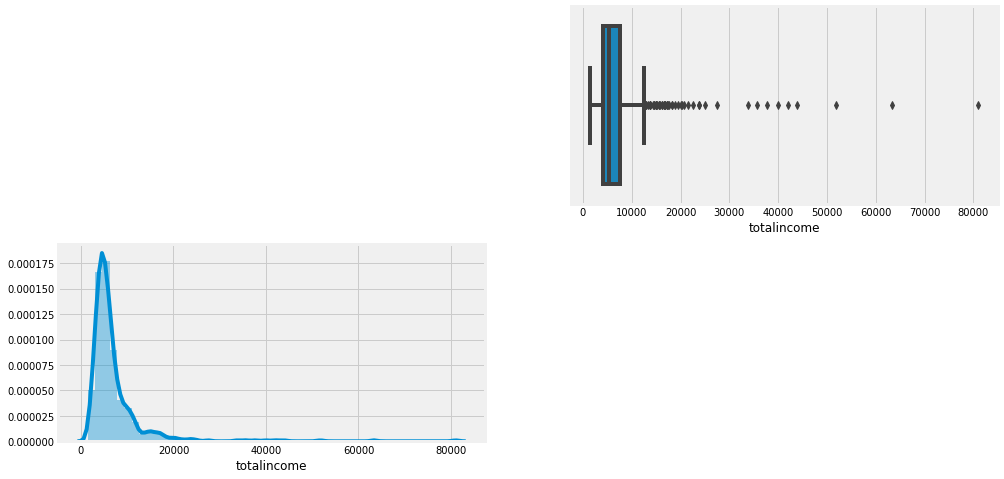

In [36]:
plt.figure(figsize=(15,8))
plt.subplot(222)
sns.boxplot(dftr['totalincome'])

plt.subplot(223)
sns.distplot(dftr['totalincome'])



In [37]:
dftr['loanamount_log'] = np.log(dftr['loanamount'])

dftr['totalincome'] = np.log(dftr['totalincome'])

In [38]:
dftr.head(2)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,totalincome,loanamount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.714568,4.852030


In [39]:
dftr.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
totalincome           0
loanamount_log        0
dtype: int64

In [40]:
dftr.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'totalincome', 'loanamount_log'],
      dtype='object')

In [41]:
dftr['gender'].mode()

0    Male
dtype: object

In [42]:
dftr['gender'].fillna(dftr['gender'].mode(), inplace=True)


In [43]:
dftr['married'].fillna(dftr['married'].mode(), inplace=True)


In [44]:
dftr['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
dftr['self_employed'].fillna(dftr['self_employed'].mode(), inplace=True)

In [46]:
dftr.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
totalincome           0
loanamount_log        0
dtype: int64

In [47]:
dftr['gender'].fillna(dftr['gender'].mode()[0], inplace=True)

In [48]:
dftr['self_employed'].fillna(dftr['self_employed'].mode()[0], inplace=True)

In [49]:
dftr['married'].fillna(dftr['married'].mode()[0], inplace=True)

In [50]:
dftr.isna().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
totalincome           0
loanamount_log        0
dtype: int64

In [51]:
dftr['dependents'].fillna(dftr['dependents'].mode()[0], inplace=True)

In [52]:
dftr.isna().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
totalincome           0
loanamount_log        0
dtype: int64

In [53]:
dftr['loan_amount_term'].fillna(dftr['loan_amount_term'].mean(), inplace=True)

In [54]:
dftr.isna().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term      0
credit_history       50
property_area         0
loan_status           0
totalincome           0
loanamount_log        0
dtype: int64

In [55]:
dftr.credit_history.unique()

array([ 1.,  0., nan])

In [56]:
dftr['credit_history'].fillna(dftr['credit_history'].mode()[0], inplace=True)

In [57]:
dftr.isna().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
totalincome          0
loanamount_log       0
dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
cat_cols = ['gender','married','dependents','education','self_employed', 'property_area', 'loan_status']

In [60]:
le = LabelEncoder()

In [61]:
for i in cat_cols: 
    dftr[i] = le.fit_transform(dftr[i]) 
    
dftr.dtypes

loan_id               object
gender                 int32
married                int32
dependents             int32
education              int32
self_employed          int32
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area          int32
loan_status            int32
totalincome          float64
loanamount_log       float64
dtype: object

In [62]:
dftr.head(10)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,totalincome,loanamount_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,8.674026,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.714568,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,8.006368,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,8.505323,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,8.699515,4.948760
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1,9.170872,5.587249
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1,8.255569,4.553877
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0,8.619750,5.062595
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1,8.618305,5.123964
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0,10.077819,5.855072


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
from sklearn import metrics

In [65]:
X = ['loan_amount_term', 'credit_history', 'loanamount_log']

Y = 'loan_status'

In [66]:
DT_model = DecisionTreeClassifier()

In [67]:
DT_model.fit(dftr[X], dftr[Y])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
dftr_predictions = DT_model.predict(dftr[X])

In [69]:
accuracy = metrics.accuracy_score(dftr[Y],dftr_predictions)

In [70]:
print(accuracy)

0.8941368078175895


In [71]:
X1 = ['loan_amount_term', 'credit_history', 'loanamount_log','gender','married', 'education']

Y1 = 'loan_status'

In [72]:
DT_model1 = DecisionTreeClassifier()

DT_model1.fit(dftr[X1], dftr[Y1])

dftr_predictions1 = DT_model1.predict(dftr[X1])

accuracy1 = metrics.accuracy_score(dftr[Y1],dftr_predictions1)

print(accuracy1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.9576547231270358


In [73]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import collections 


C:\Users\School\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


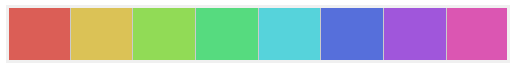

In [74]:
sns.palplot(sns.color_palette("hls", 8))

In [75]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [76]:
import os
os.getcwd()

'C:\\Users\\School'

In [77]:
# Create DOT data

export_graphviz(DT_model1, out_file='tree_bw.dot', feature_names=X1)





In [78]:
dot_data = export_graphviz(DT_model1, out_file=None,feature_names=X1)



In [79]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

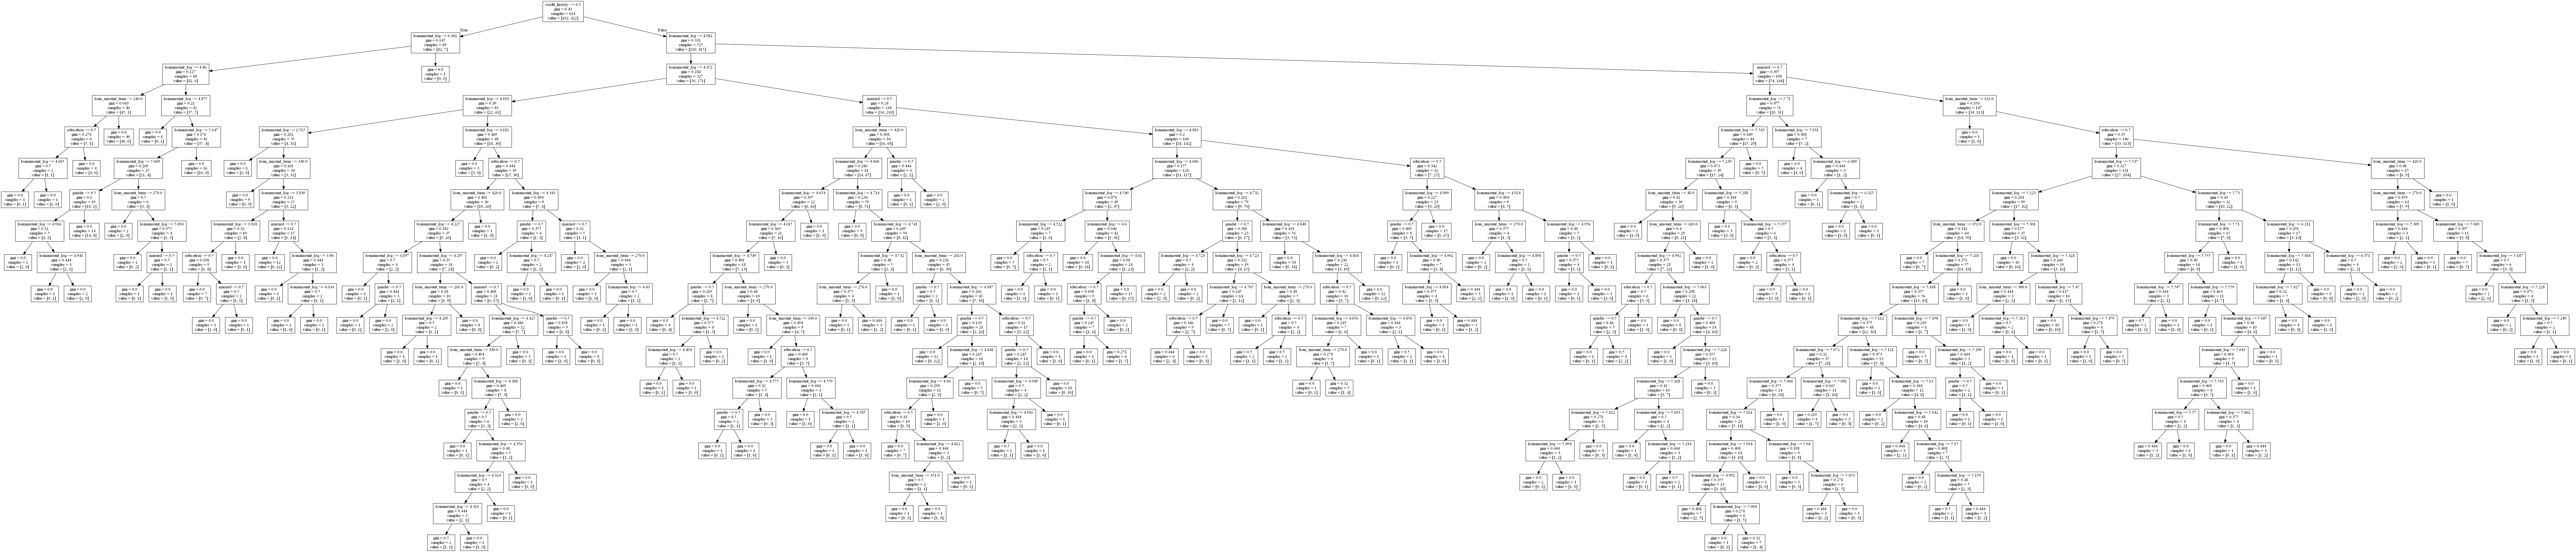

In [80]:
# Show graph
Image(graph.create_png())

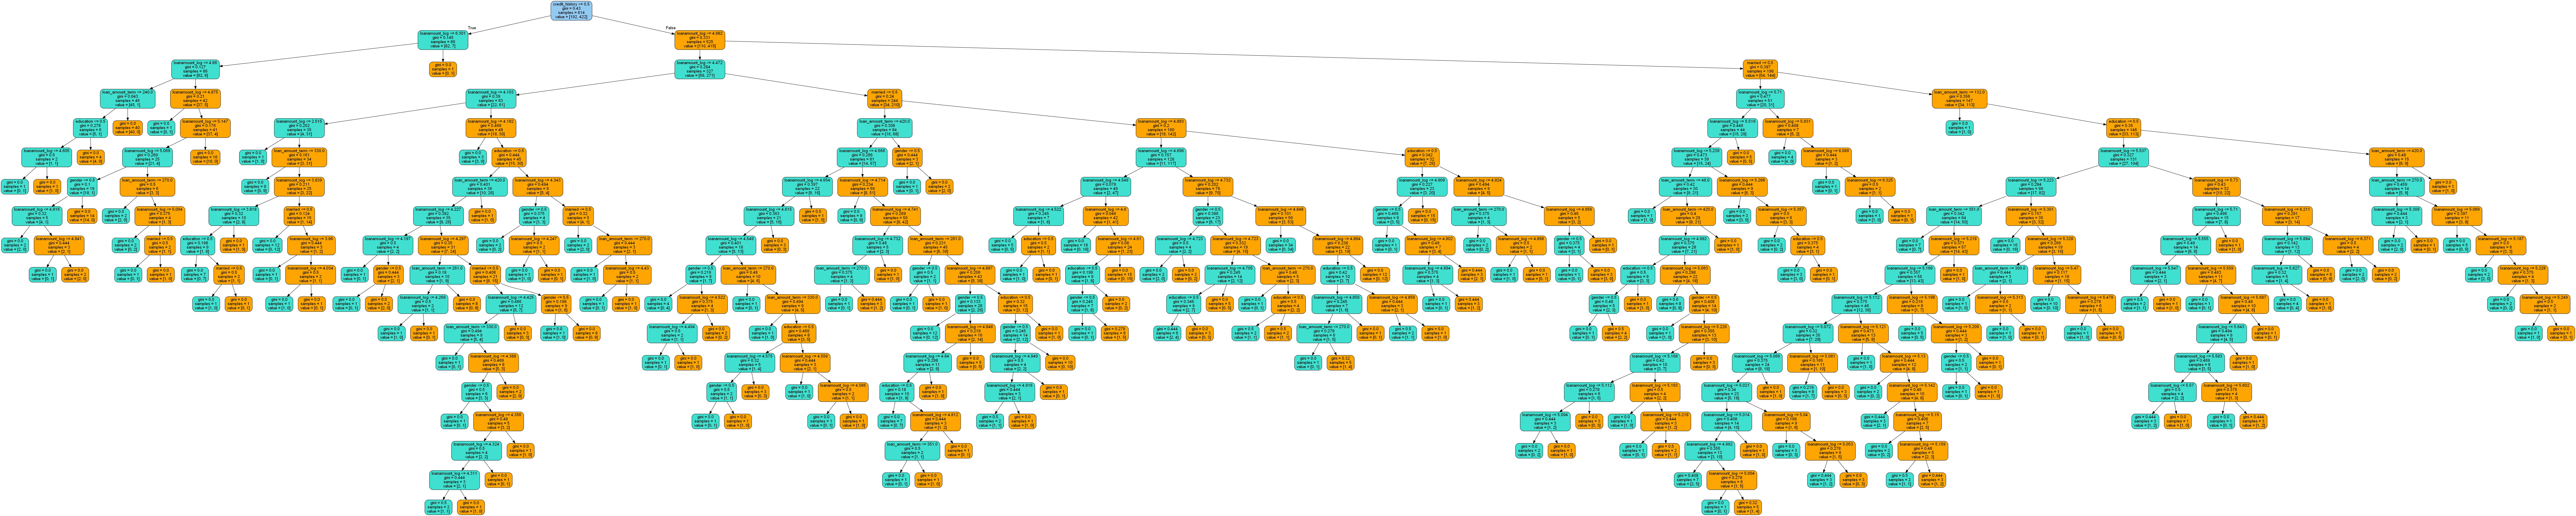

True

In [82]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections

# Create DOT data
export_graphviz(DT_model1, out_file='tree_color.dot', feature_names=X1,filled=True, rounded=True)
dot_data = export_graphviz(DT_model1, out_file=None, feature_names=X1,filled=True,  rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
# Show graph
Image(graph.create_png())
graph.write_png('tree.png')